# PCA: Principal Component Analysis

- Lecture: Mathematics for AI (2024)
- Instructor: Prof. Jaeyoung Choi
- TA: Jongmoon Ryu
- TA email: 0917jong@gmail.com
- Date: 2024.04.02 TUE

## 🚀 1. PCA using 2D dataset

<img src="https://i.makeagif.com/media/11-04-2020/xH2UMU.gif" width="50%"/>

- In this exercise, we will generate random 2D data and perform PCA analysis.
- We will proceed with the practice using only numpy, without utilizing the PCA library provided by scikit-learn.
- Reference: https://towardsdatascience.com/a-step-by-step-implementation-of-principal-component-analysis-5520cc6cd598

### 🌠 1.1. Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2024)
plt.style.use('classic') # 테마 설정

### 🌠 1.2. Create random dataset

`multivariate normal distribution`

<div align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8e/MultivariateNormal.png/440px-MultivariateNormal.png" width="50%" />
</div>

<br>

$$ \tilde{d} \sim \mathcal{N}(\mu, \Sigma) $$
- $\mu \in \mathbb{R}^2$ : Mean vector
- $\Sigma \in \mathbb{R}^{2\times 2}$ : Covariance Matrix

[*] Dataset shape: (1000, 2)


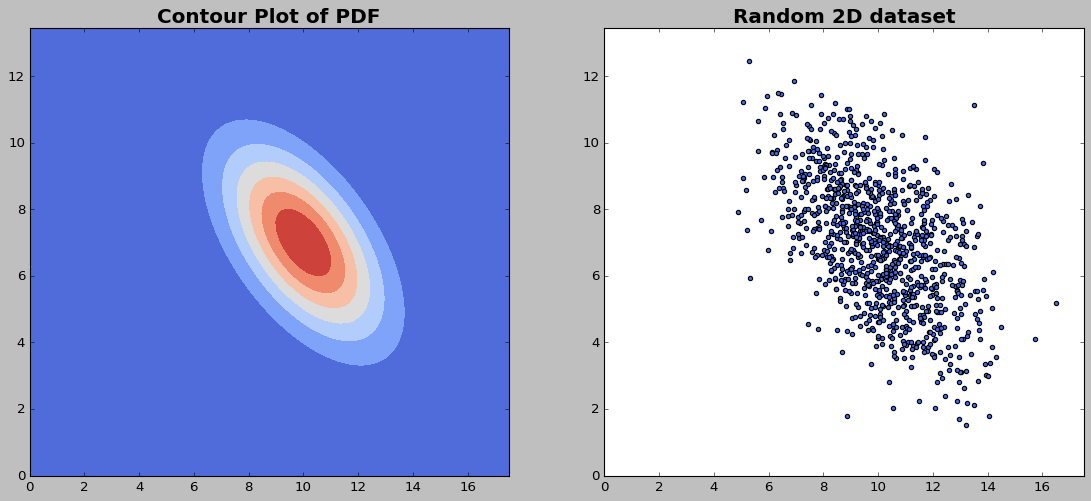

In [ ]:
# -- create dataset
mu              = np.array([10, 7])
sigma           = np.array([[3.5, -2], [-2, 3.5]])
original_data   = np.random.multivariate_normal(mu, sigma, size=(1000))
orig_x, orig_y  = original_data[:, 0], original_data[:, 1]
print(f'[*] Dataset shape: {original_data.shape}')


# -- data visualization
fig, axes = plt.subplots(1, 2, figsize=(17, 7))

# (1) contour plot - multivariate normal distribution
x_grid, y_grid  = np.meshgrid(np.linspace(0, orig_x.max() + 1, 100), np.linspace(0, orig_y.max() + 1, 100))
pos             = np.empty(x_grid.shape + (2,))
pos[:, :, 0]    = x_grid
pos[:, :, 1]    = y_grid
pdf             = np.exp(-0.5 * np.sum((pos - mu) @ np.linalg.inv(sigma) * (pos - mu), axis=-1)) / (2 * np.pi * np.sqrt(np.linalg.det(sigma)))

axes[0].contourf(x_grid, y_grid, pdf, cmap='coolwarm')
axes[0].set_xlim([0, max(orig_x) + 1])
axes[0].set_ylim([0, max(orig_y) + 1])
axes[0].set_title("Contour Plot of PDF", fontweight='semibold', fontsize=18)

# (2) scatter plot
axes[1].scatter(x=orig_x, y=orig_y, marker='o', s=15, c='royalblue')
axes[1].set_title("Random 2D dataset", fontweight='semibold', fontsize=18)
axes[1].set_xlim([0, max(orig_x) + 1])
axes[1].set_ylim([0, max(orig_y) + 1])

plt.show()

### 🌠 1.3. Normalize dataset

Mean Centering

$$ d_i = \tilde{d_i} - \bar{d} $$

- $d_i$ : Mean centered data
- $\tilde{d_i}$ : $i$-th original data
- $\bar{d}$ : Mean

<br>

> *Why do we have to move data to mean centered?*

- To ensure accurate computation of the covariance matrix.
- Essential for correctly determining the relationships between variables.

In [ ]:
mean            = np.mean(original_data, axis=0)
centered_data   = original_data - mean
x               = centered_data[:, 0]
y               = centered_data[:, 1]
print(f'[*] Calculated mean: {mean}')

[*] Calculated mean: [10.00712086  6.98843553]


In [ ]:
# @title
def set_ax_as_coordinate_plane(ax, lim):

    ax.set_xlim([-lim, lim])
    ax.set_ylim([-lim, lim])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    ax.spines['bottom'].set_position(('data',0))
    ax.spines['left'].set_position(('data',0))

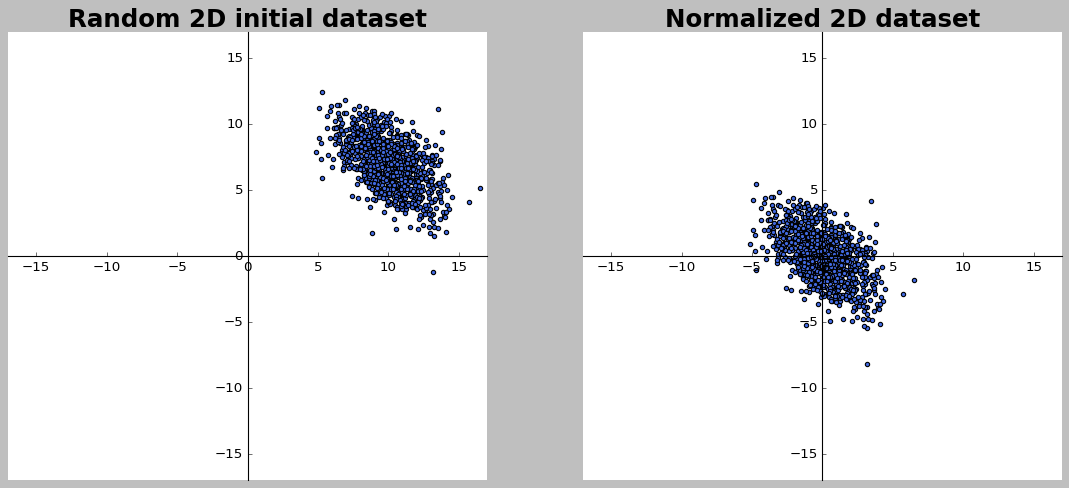

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(17, 7))

# Visualizing the data before normalization
axes[0].scatter(x=orig_x, y=orig_y, marker='o', s=15, c='royalblue')
axes[0].set_title("Random 2D initial dataset", fontweight='semibold', fontsize=22)

# Visualizing the data after normalization
axes[1].scatter(x=x, y=y, marker='o', s=15, c='royalblue')
axes[1].set_title("Normalized 2D dataset", fontweight='semibold', fontsize=22)

# Setting the range for the x and y axes
for ax in axes:
    set_ax_as_coordinate_plane(ax, 17)

plt.show()


### 🌠 1.4. Get principal component(s)

**(1) Calculating the Covariance Matrix**

$$ \Sigma = \begin{pmatrix} cov(x, x) & cov(x, y) \\ cov(y, x) & cov(y, y)\end{pmatrix}, \quad \Sigma = \frac{1}{n} X^\top X$$

- What is a covariance matrix [🔗 LINK](https://en.wikipedia.org/wiki/Covariance_matrix)
- Compute the covariance of all feature dimensions. (Number of dimensions = 2)
- We can just use `np.cov()` function to calculate covariance matrix.

    By computing the covariance matrix, <font color='blue'>we can identify the correlations between variables, enabling us to determine the directions along which compressing the data would result in the least loss</font>, based on which principal components capture the most significant variability.

<br>

**(2) Calculating Eigen Vectors and Eigen Values**

- Using the covariance matrix computed in (1), calculate the eigen vectors and eigen values.
- You can use `np.linalg.eig()` function to get eigen values and eigen vectors.

In [ ]:
def compute_principal_component_2d(feature):
    # Calculate the covariance matrix of the features
    Sigma = np.cov(feature.T)

    # Compute eigenvalues and eigenvectors of the covariance matrix
    eig_val, eig_vec = np.linalg.eig(Sigma)

    # Sort eigenvalues and eigenvectors in decreasing order of eigenvalues
    idx = eig_val.argsort()[::-1]  # Sort in decreasing order
    eig_val = eig_val[idx]
    eig_vec = eig_vec[:, idx]

    # Principal components are the eigenvectors corresponding to the largest eigenvalues
    principal_component_1 = eig_val[0] * eig_vec[:, 0]
    principal_component_2 = eig_val[1] * eig_vec[:, 1]

    return (principal_component_1, principal_component_2)


# Compute the principal components
principal_component_1, principal_component_2 = compute_principal_component_2d(centered_data)
print(f"[*] Principal component 1: {principal_component_1}")
print(f"[*] Principal component 2: {principal_component_2}")

[*] Principal component 1: [ 3.82207884 -4.04310986]
[*] Principal component 2: [-1.16680729 -1.10301961]


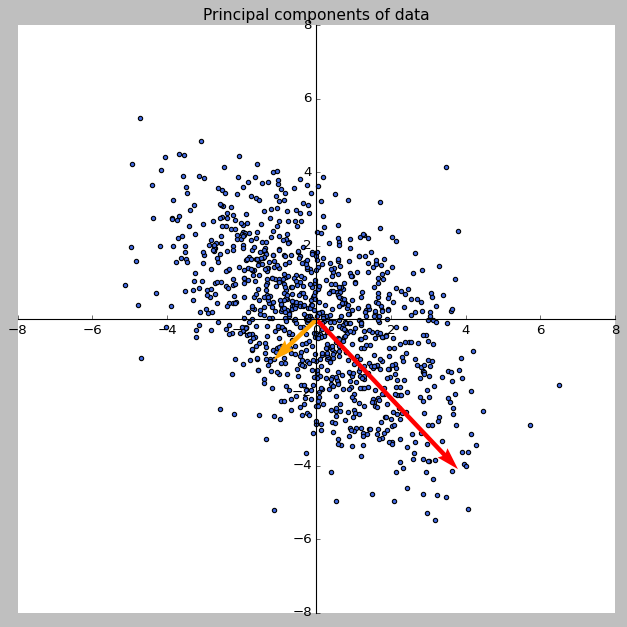

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(centered_data[:, 0], centered_data[:, 1], marker='o', s=15, c='royalblue')

# Plot the first principal component
ax.quiver(0.0, 0.0, principal_component_1[0], principal_component_1[1],
          scale=1, units="xy", color="red")

# Plot the second principal component
ax.quiver(0.0, 0.0, principal_component_2[0], principal_component_2[1],
          scale=1, units="xy", color="orange")

ax.set_title("Principal components of data", fontsize=14)

set_ax_as_coordinate_plane(ax, 8)

plt.tight_layout()
plt.show()

### 🌠 1.5. Projection onto first principal component

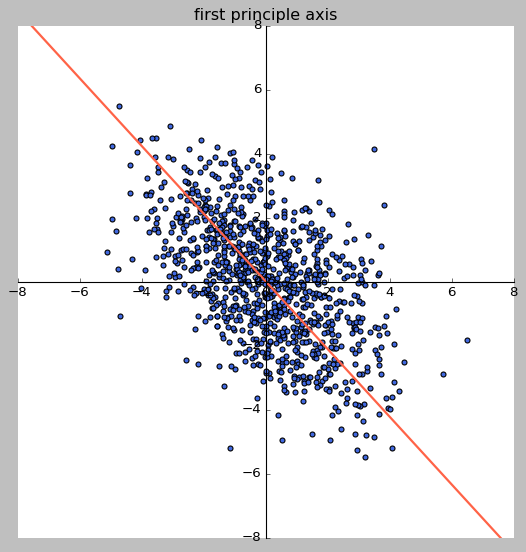

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
plt.title('first principle axis')

# Calculating the slope of the first principal component
slope = principal_component_1[1] / principal_component_1[0]

# Generating x-coordinates for plotting the principal axis line
grid_x = np.linspace(-8, 8)

# Calculating y-coordinates based on the slope of the principal axis
value_y = grid_x * slope

# (1) Plotting the centered data points
ax.scatter(centered_data[:, 0], centered_data[:, 1], c='royalblue')

# (2) Plotting the first principal component vector
ax.plot(grid_x, value_y, color='tomato', linewidth=2)

set_ax_as_coordinate_plane(ax, 8)
plt.show()


$$  $$

In [ ]:
def compute_projection_onto_line(feature, vector):
    # Calculate the scalar component of the projection.
    scalar = np.matmul(feature, vector) / np.dot(vector, vector)

    # Compute the projection for each component (x and y) of the vector.
    # The scalar * component of the vector gives the projected values
    # for each point along the direction of the vector.
    projection = np.zeros(feature.shape)
    projection[:,0] = scalar * vector[0]  # Projected x-coordinates
    projection[:,1] = scalar * vector[1]  # Projected y-coordinates

    return projection


In [ ]:
def plot_projection_result(pc):
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))

    # Calculate the slope of the principal component line
    slope = pc[1] / pc[0]
    grid_x = np.linspace(-8, 8)
    value_y = grid_x * slope

    # Plot the principal component line on both subplots
    for ax in axes:
        ax.plot(grid_x, value_y, color='tomato', linewidth=2, zorder=1)  # Principal component line
        set_ax_as_coordinate_plane(ax, 8)

    # -- Plotting the entire dataset
    # Compute the projection of the entire dataset onto the principal component
    projection1 = compute_projection_onto_line(centered_data, pc)
    axes[0].scatter(x, y, c='royalblue', zorder=3)
    axes[0].scatter(projection1[:,0], projection1[:,1], c='gold', zorder=3)

    # -- Plotting a sample of the dataset
    # Select a random sample of data points
    sample_idx = np.random.randint(low=0, high=x.shape[0] - 1, size=50)
    sample_data = centered_data[sample_idx]
    # Compute the projection of the sample onto the principal component
    sample_projection = compute_projection_onto_line(sample_data, pc)
    axes[1].scatter(x[sample_idx], y[sample_idx], c='royalblue', zorder=3)
    axes[1].scatter(sample_projection[:, 0], sample_projection[:, 1], c='gold', zorder=3)
    axes[1].plot([x[sample_idx], sample_projection[:, 0]], [y[sample_idx], sample_projection[:, 1]], '-', color='grey')

    plt.show()


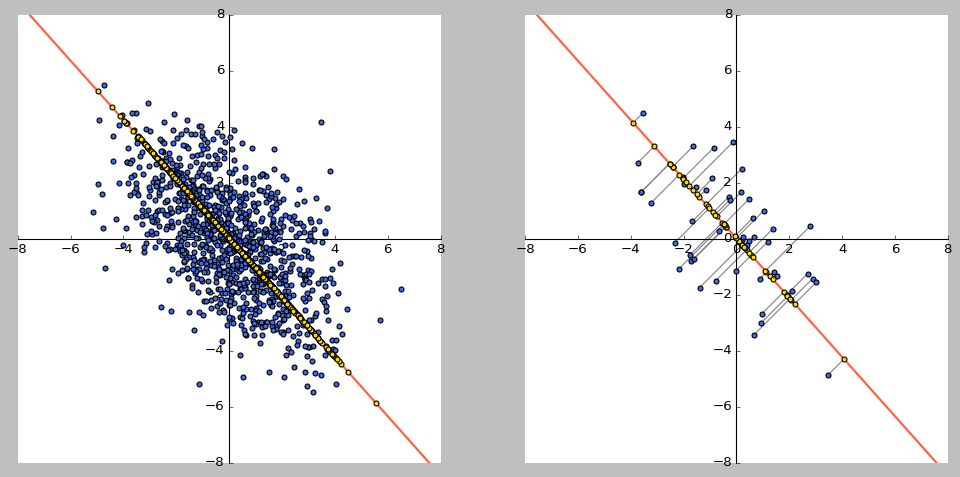

In [ ]:
plot_projection_result(principal_component_1)

### 🌠 1.6. Projection onto second principal component

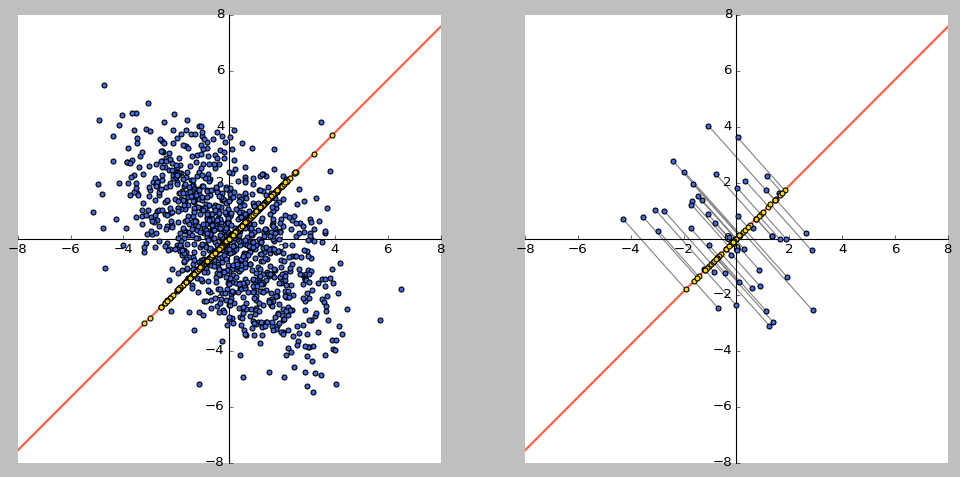

In [ ]:
plot_projection_result(principal_component_2)

### 🌠 1.7. Summary

Let's summarize the process of performing PCA (Principal Component Analysis) from the data, excluding all visualization code

In [ ]:
# 데이터가 이미 생성되어 있다고 가정

# (1) 중심이 원점이 되도록 데이터를 평행 이동
centered_data = original_data - np.mean(original_data, axis=0)

# (2) 데이터의 공분산행렬을 계산
sigma = np.cov(centered_data.T)

# (3) 공분산 행렬을 사용해 고유값과 고유벡터를 계산
eig_vals, eig_vecs = np.linalg.eig(sigma)

# (4) 주성분인 고유벡터를 고유값으로 정렬 (내림차순)
idx = eig_vals.argsort()[::-1]
eig_vecs = eig_vecs[:, idx]

# (5) 첫번째 주성분으로 모든 데이터를 정사영
scalar = np.matmul(centered_data, eig_vecs[0]) / np.dot(eig_vecs[0], eig_vecs[0])
projection = np.zeros(centered_data.shape)
projection[:,0] = scalar * eig_vecs[0, 0]
projection[:,1] = scalar * eig_vecs[0, 1]

### 🌟 Deep Dive

소제: PCA를 계산하는데 있어서 공분산 행렬이 필요했던 이유, 그리고 공분산 행렬에 대한 eigen vector와 eigen value를 구해야만 했던 이유

<img src="https://github.com/Orca0917/Orca0917.github.io-repo/assets/91870042/8e1f0e80-82ac-407b-82f5-e817e6dd5818" width="50%" />

PCA(주성분 분석)는 고차원 데이터를 낮은 차원으로 압축하는 기법입니다. 압축이 잘 되었다는 것은 원래 정보와 압축된 정보 사이의 차이가 적다는 것을 의미합니다. 이것은 새롭게 투영된 점과 원래의 점 사이의 거리 합이 적어야 한다는 것을 직관적으로 이해할 수 있습니다. 이를 수식으로 표현해보겠습니다. 먼저 각 데이터인 붉은 점을 $\tilde{d_i}$라고 할 때, 앞서 실습했던 것과 같이 데이터로부터 평균을 빼서 원점으로 이동시키는 것부터 시작합니다.

<br>

$$
\begin{aligned}
d_i = \tilde{d_i} - \bar{d} \\
\end{aligned}
$$

<br>

이후, $d_i$ 값을 실제 주성분 벡터 $\mathbf{u}$에 정사영시킨 거리(위 그림에서 점선으로 표현)를 계산합니다. $d_{i}$를 $\mathbf{u}$에 정사영시킨 벡터는 $(d_i^\top \mathbf{u}) \cdot \mathbf{u}$가 됩니다. 그러면 원래 데이터 $d_i$와 주성분 사이의 거리는 $\|d_i - (d_i^\top \mathbf{u}) \cdot \mathbf{u}\|_2^2$로 표현할 수 있습니다(계산의 편의를 위해 제곱). 모든 데이터를 고려해야 하므로 전체 거리의 합을 구하고 평균을 내면 아래와 같습니다.

<br>

$$
\begin{aligned}
&\min_u \frac{1}{n} \sum_i \left( d_i - d_i^\top \mathbf{u} \cdot \mathbf{u}) \right)^\top \left( d_i - d_i^\top \mathbf{u} \cdot \mathbf{u}) \right) \quad \text{s.t. } \|u\|_2^2 = \mathbf{u}^\top \mathbf{u} = 1\\
= &\min_u \frac{1}{n} \sum_i \left( d_i^\top d_i - d_i^\top d_i^\top \mathbf{u}\cdot \mathbf{u}-d_i^\top \mathbf{u} \cdot \mathbf{u}^\top d_i + d_i^\top \mathbf{u} \cdot \mathbf{u}^\top \cdot d_i^\top \mathbf{u} \cdot \mathbf{u} \right) \\
= &\min_u -\frac{1}{n} \sum_i \mathbf{u}^\top d_i (d_i^\top \mathbf{u}) \\
= &\min_u -\frac{1}{n} \sum_i \mathbf{u}^\top (\tilde{d_i} - \bar{d})(\tilde{d_i} - \bar{d})^\top \mathbf{u} \\
= &\min_u - \mathbf{u}^\top \frac{1}{n} \sum_i  (\tilde{d_i} - \bar{d})(\tilde{d_i} - \bar{d})^\top \mathbf{u} \\
= &\min_u - \mathbf{u}^\top \mathbf{A}_d \mathbf{u} \qquad \text{where, } \mathbf{A}_d \text{ is cov matrix.}\\
= &\max_u  \mathbf{u}^\top \mathbf{A}_d \mathbf{u} \\
\end{aligned}
$$

<br>

계산 과정을 살펴보면, 자연스럽게 공분산 행렬 $\mathbf{A}_d$가 등장하게 되며, 위 식을 최대화하는 벡터 $\mathbf{u}$를 찾되, 제약 조건 $\|\mathbf{u}\|_2^2 = 1$을 만족해야 합니다. 따라서 라그랑주 승수법을 적용합니다.

<br>

$$
\mathcal{L} = \mathbf{u}^\top \mathbf{A}_d \mathbf{u} + \lambda(1 - \mathbf{u}^\top \mathbf{u}) \qquad \text{by lagrange multiplier}
$$

<br>

그리고 위 라그랑주 승수를 적용한 식의 미분값이 0이되는 지점이 구하려고 하는 식을 최대 또는 최소화시킬 수 있는 지점이므로 먼저 벡터 $\mathbf{u}$에 대해 편미분을 진행합니다.

<br>

$$
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mathbf{u}^\top} &= d \mathbf{u}^\top \mathbf{A}_d\mathbf{u} + \mathbf{u}^\top \mathbf{A}_d d\mathbf{u} - \lambda d\mathbf{u}^\top \mathbf{u} - \lambda \mathbf{u}^\top d\mathbf{u} \\
&= 2\mathbf{u}^\top \mathbf{A}_d d \mathbf{u} - 2 \lambda \mathbf{u}^\top d \mathbf{u} \\
&= 2 (\mathbf{u}^\top \mathbf{A}_d - \lambda \mathbf{u}^\top) d\mathbf{u}
\end{aligned}
$$

<br>

위 미분값이 0이되는 지점은 괄호 내의 식이 0이 되는 경우이며 그것을 다시 표현해봅시다.

<br>

$$
\begin{aligned}
\mathbf{u}^\top \mathbf{A}_d &= \lambda \mathbf{u}^\top\\
\Rightarrow \mathbf{A}_d \mathbf{u} &= \lambda \mathbf{u}
\end{aligned}
$$

<br>

마지막으로 얻어낸 최종 식은 상당히 익숙한 수식으로, eigen vector와 eigen value에 대한 정의이기도 합니다. 따라서 문제는 위 식을 만족하는 벡터 $\mathbf{u}$는 공분산 행렬 $\mathbf{A}_d$의 eigen vector와 eigen value $\lambda$를 찾는 문제와 같아지게 됩니다. 지금까지 이렇게 해서 PCA 과정에서 공분산행렬과 고유벡터 그리고 고유값이 등장하는 이유에 대해서 살펴보았습니다.

<br><br>

## 🚀 2. PCA using 3D dataset

- So far, we have used a 2-dimensional dataset.
- PCA is a very useful dimensionality reduction technique that can be applied not only in 2D but also in multi-dimensional spaces.
- In this part, we will practice generating a 3-dimensional dataset randomly and projecting it into 2 dimensions.

### 🌠 2.1. Import libraries

In [ ]:
import numpy as np
import plotly.graph_objects as go

### 🌠 2.2. Create random 3D dataset
- Following the previous examples, we will generate random data from a multivariate normal distribution

In [ ]:
mu      = [3, 2, 5]         # mean vector
Sigma   = [[5, 4, 0.2],   # covariance matrix
           [4, 7, 3],
           [0.2, 3, 4]]

# Create 400 data points
np.random.seed(2024)
original_data = np.random.multivariate_normal(mu, Sigma, 400)

In [ ]:
# Data preparation
x, y, z = original_data.T

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=x,                    # X-axis data
    y=y,                    # Y-axis data
    z=z,                    # Z-axis data
    mode='markers',         # Use markers to represent data points
    marker=dict(
        size=1.5,           # Size of the markers
        opacity=0.8,        # Marker opacity
        color='royalblue'   # Color of the markers
    )
)])

# Set the layout of the plot
fig.update_layout(title='Original data (3D)',
                  scene=dict(
                      xaxis_title='X Axis',  # Title for the X-axis
                      yaxis_title='Y Axis',  # Title for the Y-axis
                      zaxis_title='Z Axis'   # Title for the Z-axis
                  ))

fig.show()


### 🌠 2.3. Normalize dataset

In [ ]:
mean            = np.mean(original_data, axis=0)
centered_data   = original_data - mean
x               = centered_data[:, 0]
y               = centered_data[:, 1]
z               = centered_data[:, 2]
print(f'[*] Calculated mean: {mean}')

[*] Calculated mean: [3.06420767 2.07566618 5.05547671]


In [ ]:
# Create a 3D Scatter Plot
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=1.5,
        opacity=0.8,
    )
)])

# Set the layout
fig.update_layout(title='Centered data',
                  scene=dict(
                      xaxis_title='X Axis',
                      yaxis_title='Y Axis',
                      zaxis_title='Z Axis'
                  ))

# Visualize
fig.show()


### 🌠 2.4. Get principal components

In [ ]:
def compute_principal_component(feature):
    # Calculate the covariance matrix of the feature set
    Sigma = np.cov(feature.T)

    # Compute eigenvalues and eigenvectors of the covariance matrix
    eig_val, eig_vec = np.linalg.eig(Sigma)

    # Sort eigenvalues and corresponding eigenvectors in decreasing order
    idx = eig_val.argsort()[::-1]

    # Reorder eigenvalues and eigenvectors according to sorted indices
    eig_val = eig_val[idx]
    eig_vec = eig_vec[:, idx]

    # Calculate the first three principal components by multiplying each eigenvalue with its corresponding eigenvector
    principal_component_1 = eig_val[0] * eig_vec[:, 0]
    principal_component_2 = eig_val[1] * eig_vec[:, 1]
    principal_component_3 = eig_val[2] * eig_vec[:, 2]

    # Return the first three principal components
    return (principal_component_1, principal_component_2, principal_component_3)

# Compute the principal components from the centered data
pc1, pc2, pc3 = compute_principal_component(centered_data)

# Print the first three principal components
print(f"Principal component 1: {pc1}")
print(f"Principal component 2: {pc2}")
print(f"Principal component 3: {pc3}")


Principal component 1: [-5.44628995 -8.46510228 -4.72345033]
Principal component 2: [-2.86897386  0.16109226  3.01931852]
Principal component 3: [ 0.41309336 -0.49967715  0.41918339]


In [ ]:
fig = go.Figure()

for idx, pc in enumerate([pc1, pc2, pc3]):
    # Add a 3D scatter trace representing each principal component as a line with a marker
    fig.add_trace(go.Scatter3d(x=[0, pc[0]], y=[0, pc[1]], z=[0, pc[2]],
                               mode='lines+markers',  # Display as both line and marker
                               line=dict(width=5),  # Line width
                               marker=dict(size=3),  # Marker size
                               name=f'Principal component {idx + 1}'))  # Name it according to its order

# Add trace for the data points
fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='markers',
    marker=dict(
        size=1.5,       # Marker size for data points
        opacity=0.5,    # Marker opacity for data points
    ),
    name='Data'         # Name of the trace
))

# Update the layout of the figure
fig.update_layout(title='Visualization of principal components',
                  scene=dict(aspectmode='cube',
                             xaxis=dict(range=[-10, 10], autorange=False),
                             yaxis=dict(range=[-10, 10], autorange=False),
                             zaxis=dict(range=[-10, 10], autorange=False)))
fig.show()


### 🌠 2.5. Projection onto plane

- Normal vector: $\vec{n} = (a, b, c)$
- Equation of plane: $ax + by + cz + d = 0$

In [ ]:
def projection_onto_z_plane(x, y, pc):
    _z = -(pc[0] * x + pc[1] * y) / pc[2]
    return _z

In [ ]:

# Generate a grid for the plane and calculate its z values based on the third principal component
x_plane, y_plane = np.meshgrid(np.linspace(-10, 10), np.linspace(-10, 10))  # Creating a grid for the plane
z_plane = projection_onto_z_plane(x_plane, y_plane, pc3)  # Calculating z values to complete the plane

fig = go.Figure()

# Plotting each principal component as a vector from the origin
for idx, pc in enumerate([pc1, pc2, pc3]):
    fig.add_trace(go.Scatter3d(x=[0, pc[0]], y=[0, pc[1]], z=[0, pc[2]],
                               mode='lines+markers',  # Display as lines and markers
                               line=dict(width=5),
                               marker=dict(size=3),
                               name=f'Principal component {idx + 1}'))

# Adding a trace for the original data points
fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='markers',
    marker=dict(
        size=1.5,
        opacity=0.8,
    ),
    name='Data'
))

# Adding the plane defined by the principal components
fig.add_trace(go.Surface(
    x=x_plane, y=y_plane, z=z_plane,
    opacity=0.5,
    colorscale=[[0, 'rgb(150,150,150)'], [1, 'rgb(150,150,150)']],  # Set to grey
    showscale=False  # Hide the color scale
    ))

# Setting up the layout for the 3D plot
fig.update_layout(title='3D Vectors from Origin',
                  scene=dict(aspectmode='cube',
                             xaxis=dict(range=[-10, 10], autorange=False),
                             yaxis=dict(range=[-10, 10], autorange=False),
                             zaxis=dict(range=[-10, 10], autorange=False)))
# Displaying the plot
fig.show()


In [ ]:
# Create a grid for plotting a plane defined by the third principal component
x_plane, y_plane = np.meshgrid(np.linspace(-10, 10), np.linspace(-10, 10))  # Creating a grid for the plane
z_plane = - (pc3[0] * x_plane + pc3[1] * y_plane) / pc3[2]  # Calculating z values to complete the plane

fig = go.Figure()

# Plot each principal component as a vector from the origin
for idx, pc in enumerate([pc1, pc2, pc3]):
    fig.add_trace(go.Scatter3d(x=[0, pc[0]], y=[0, pc[1]], z=[0, pc[2]],
                               mode='lines+markers',  # Display as lines and markers
                               line=dict(width=5),
                               marker=dict(size=3),
                               name=f'Principal component {idx + 1}'))

# Add the original data points to the plot
fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='markers',
    marker=dict(
        size=1.5,
        opacity=0.8
    ),
    name='Data',
    showlegend=False
))

# Add the plane defined by the principal components to the plot
fig.add_trace(go.Surface(
    x=x_plane, y=y_plane, z=z_plane,
    opacity=0.5,
    colorscale=[[0, 'rgb(150,150,150)'], [1, 'rgb(150,150,150)']],  # Set to grey color
    showscale=False  # Hide the color scale
    ))

# For each data point, calculate its projection onto the plane and draw a line
for data in centered_data:
    x_, y_, z_ = data
    # Calculate the distance from the point to the plane along the pc3 direction
    d = (np.dot(pc3, data)) / np.linalg.norm(pc3)
    # Calculate the projected point on the plane
    z_proj = data - d * pc3 / np.linalg.norm(pc3)
    # Draw a line from the original point to its projection on the plane
    fig.add_trace(go.Scatter3d(x=[x_, z_proj[0]], y=[y_, z_proj[1]], z=[z_, z_proj[2]],
                               mode='lines',
                               showlegend=False,
                               line=dict(color='gray', width=1)))

# Update the layout of the figure to customize the appearance
fig.update_layout(title='Projection to 2D plane',
                  scene=dict(aspectmode='cube',
                             xaxis=dict(range=[-10, 10], autorange=False),
                             yaxis=dict(range=[-10, 10], autorange=False),
                             zaxis=dict(range=[-10, 10], autorange=False)))

fig.show()


In [ ]:
# Generate a grid for plotting a plane
x_plane, y_plane = np.meshgrid(np.linspace(-10, 10), np.linspace(-10, 10))
# Calculate z-values for the plane using the projection_onto_z_plane function
z_plane = projection_onto_z_plane(x_plane, y_plane, pc3)

# Initialize the figure and add a surface trace for the plane
fig = go.Figure(data=[go.Surface(
    x=x_plane, y=y_plane, z=z_plane,
    opacity=0.5,
    colorscale=[[0, 'rgb(150,150,150)'], [1, 'rgb(150,150,150)']],  # Set to gray color
    showscale=False  # Hide the color scale
)])

# Extract x, y, z components of the centered data
proj_x, proj_y, proj_z = centered_data.T
# Calculate z-values for the data points' projection onto the plane
proj_z = projection_onto_z_plane(proj_x, proj_y, pc3)

# Add a scatter trace for the projected data points
fig.add_trace(go.Scatter3d(x=proj_x, y=proj_y, z=proj_z, mode='markers',
    marker=dict(
        size=1.5,
        opacity=0.8,
        color='tomato'
    ),
    name='Data',
    showlegend=False
))

# Update the layout to customize the plot appearance
fig.update_layout(title='PCA result (3D to 2D)',
                  scene=dict(aspectmode='cube',
                             xaxis=dict(range=[-10, 10], autorange=False),
                             yaxis=dict(range=[-10, 10], autorange=False),
                             zaxis=dict(range=[-10, 10], autorange=False)))

fig.show()
